In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['repo_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=[76./255, 75./255, 87./255])

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 31.35 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42795,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 31.35 GiB
Comm: tcp://127.0.0.1:38275,Total threads: 2
Dashboard: http://127.0.0.1:32809/status,Memory: 7.84 GiB
Nanny: tcp://127.0.0.1:43909,


In [8]:
#client.close()

In [3]:
ds1 = xr.open_mfdataset('/home1/datawork/wllovel/IMHOTEP/AI/*2012*.nc')
ds2 = xr.open_mfdataset('/home1/datawork/wllovel/IMHOTEP/GAI/*2012*.nc')

In [4]:
coords = xr.open_dataset('/home1/datawork/wllovel/IMHOTEP/eORCA025.L75_mesh_mask_closed_seas_greenland.nc')
print(coords['glamt'].min(),coords['gphit'].min())

<xarray.DataArray 'glamt' ()>
array(-180.) <xarray.DataArray 'gphit' ()>
array(-85.78911202)


In [5]:
dfm = ds1['somxl010'].max('time_counter') - ds2['somxl010'].max('time_counter')

#### Without dask client : 
CPU times: user 3.25 s, sys: 286 ms, total: 3.54 s, Wall time: 25.3 s
#### With dask client : 
CPU times: user 211 ms, sys: 25.5 ms, total: 236 ms, Wall time: 2.14 s

In [6]:
%time dfm.compute()

/export/home/anaconda3/envs/nemoparcels/lib/python3.9/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/export/home/anaconda3/envs/nemoparcels/lib/python3.9/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/export/home/anaconda3/envs/nemoparcels/lib/python3.9/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/export/home/anaconda3/envs/nemoparcels/lib/python3.9/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


CPU times: user 211 ms, sys: 25.5 ms, total: 236 ms
Wall time: 2.14 s


<xarray.DataArray 'somxl010' (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: y, x

/export/home/anaconda3/envs/nemoparcels/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


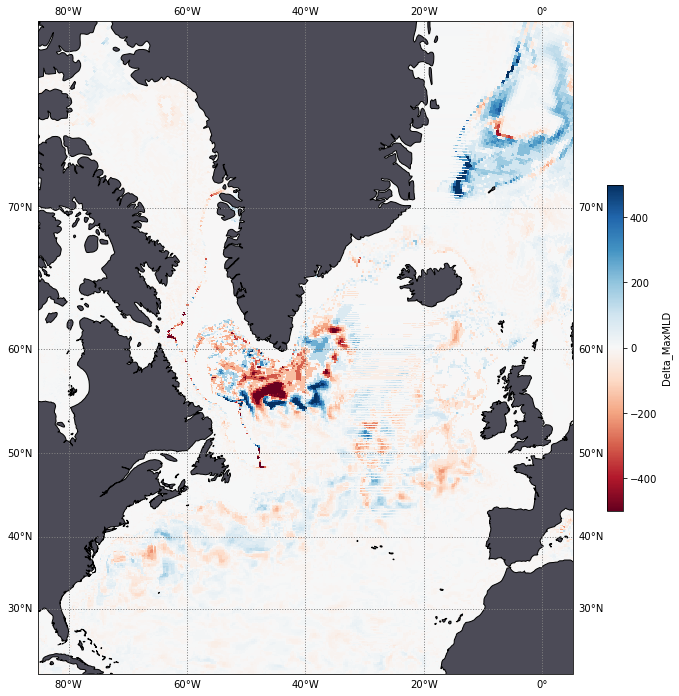

In [7]:
pr1 = ccrs.PlateCarree()
pr2 = ccrs.Mercator()
fig = plt.figure(figsize=(12,12))

ax0 = fig.add_subplot(111,projection=pr2)
ax0.add_feature(land_feature, edgecolor='black')
gls = ax0.gridlines(linewidth=1, color='gray', alpha=1, linestyle=':', draw_labels=True)
ax0.set_adjustable('datalim')
a=ax0.pcolormesh(coords['glamt'].isel(time_counter=0),coords['gphit'].isel(time_counter=0),dfm,
                 cmap=plt.get_cmap('RdBu'),transform=pr1,vmin=-500,vmax=500)
plt.colorbar(a,shrink=0.5,label='Delta_MaxMLD')
ax0.set_extent([-80.,0,20,75])